In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
interestRates = pd.read_csv('/content/drive/MyDrive/IR10.csv')
interestRates

,observation_date,IRLTLT01USM156N
0,1953-04-01,2.83
1,1953-05-01,3.05
2,1953-06-01,3.11
3,1953-07-01,2.93
4,1953-08-01,2.95
...,...,...
863,2025-03-01,4.28
864,2025-04-01,4.28
865,2025-05-01,4.42
866,2025-06-01,4.38


In [4]:
apple = yf.Ticker('AAPL')
prices = apple.history(period='5y')
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-08 00:00:00-04:00,110.841188,115.743687,109.605840,109.742020,231366600,0.0,0.0
2020-09-09 00:00:00-04:00,114.060894,115.889601,112.115459,114.119255,176940500,0.0,0.0
2020-09-10 00:00:00-04:00,117.076320,117.212500,109.430757,110.393745,182274400,0.0,0.0
2020-09-11 00:00:00-04:00,111.444274,112.086271,106.998954,108.944389,180860300,0.0,0.0
2020-09-14 00:00:00-04:00,111.590184,112.767172,109.722568,112.212723,140150100,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-28 00:00:00-04:00,230.820007,233.410004,229.339996,232.559998,38074700,0.0,0.0
2025-08-29 00:00:00-04:00,232.509995,233.380005,231.369995,232.139999,39418400,0.0,0.0
2025-09-02 00:00:00-04:00,229.250000,230.850006,226.970001,229.720001,44075600,0.0,0.0


In [5]:
prices = prices.reset_index()


In [6]:
ZerothDay = min(prices['Date']) - ((int(str(min(prices['Date']))[8:10]) -1)  * np.timedelta64(1,'D'))
ZerothDay

Timestamp('2020-09-01 00:00:00-0400', tz='America/New_York')

In [7]:
days = np.timedelta64(1,'D')

In [8]:
months = pd.DateOffset(months=1)
months

<DateOffset: months=1>

In [9]:
# testMonths = ZerothDay
# c = 0
# while testMonths < max(prices['Date']):
#   print(testMonths)
#   testMonths += pd.DateOffset(months=1)
#   c+=1
# c

In [47]:
lstDate = []
lstPrice = []

In [48]:
testMonths = ZerothDay
c = 0
while testMonths <= max(prices['Date']):
  pR = prices[(prices['Date'] >= testMonths) & (prices['Date'] <= ((testMonths + months) - days))]
  meanV = sum(pR['Close']) / len(pR)
  tms = testMonths
  testMonths += pd.DateOffset(months=1)
  print(f'our mean value is this {meanV} and our date is {tms}')
  lstDate.append(tms)
  lstPrice.append(meanV)

our mean value is this 109.29972300809972 and our date is 2020-09-01 00:00:00-04:00
our mean value is this 113.23717360063033 and our date is 2020-10-01 00:00:00-04:00
our mean value is this 113.79675559997558 and our date is 2020-11-01 00:00:00-04:00
our mean value is this 124.031306180087 and our date is 2020-12-01 00:00:00-05:00
our mean value is this 129.63056463944284 and our date is 2021-01-01 00:00:00-05:00
our mean value is this 128.31394155401932 and our date is 2021-02-01 00:00:00-05:00
our mean value is this 118.92835998535156 and our date is 2021-03-01 00:00:00-05:00
our mean value is this 128.62984466552734 and our date is 2021-04-01 00:00:00-04:00
our mean value is this 123.8896255493164 and our date is 2021-05-01 00:00:00-04:00
our mean value is this 127.03580995039506 and our date is 2021-06-01 00:00:00-04:00
our mean value is this 141.87527465820312 and our date is 2021-07-01 00:00:00-04:00
our mean value is this 145.02309348366478 and our date is 2021-08-01 00:00:00-0

In [71]:
pR = pd.DataFrame({'observation_date' : lstDate, 'month_price' : lstPrice})
pR

,observation_date,month_price
0,2020-09-01 00:00:00-04:00,109.299723
1,2020-10-01 00:00:00-04:00,113.237174
2,2020-11-01 00:00:00-04:00,113.796756
3,2020-12-01 00:00:00-05:00,124.031306
4,2021-01-01 00:00:00-05:00,129.630565
...,...,...
56,2025-05-01 00:00:00-04:00,203.628215
57,2025-06-01 00:00:00-04:00,200.429530
58,2025-07-01 00:00:00-04:00,211.041397
59,2025-08-01 00:00:00-04:00,224.578516


In [52]:
dateS = '2020-09-01'
dateE = '2025-07-01'

In [78]:
wantedIr = interestRates[interestRates['observation_date'] >= dateS]
wantedIr.index = range(len(wantedIr))
wantedIr

,observation_date,IRLTLT01USM156N
0,2020-09-01,0.68
1,2020-10-01,0.79
2,2020-11-01,0.87
3,2020-12-01,0.93
4,2021-01-01,1.08
5,2021-02-01,1.26
6,2021-03-01,1.61
7,2021-04-01,1.64
8,2021-05-01,1.62
9,2021-06-01,1.52


In [81]:
wantedPr = pR[pR['observation_date'] <= dateE]
wantedPr

,observation_date,month_price
0,2020-09-01 00:00:00-04:00,109.299723
1,2020-10-01 00:00:00-04:00,113.237174
2,2020-11-01 00:00:00-04:00,113.796756
3,2020-12-01 00:00:00-05:00,124.031306
4,2021-01-01 00:00:00-05:00,129.630565
5,2021-02-01 00:00:00-05:00,128.313942
6,2021-03-01 00:00:00-05:00,118.928360
7,2021-04-01 00:00:00-04:00,128.629845
8,2021-05-01 00:00:00-04:00,123.889626
9,2021-06-01 00:00:00-04:00,127.035810


In [85]:
# now we can finally calculate to see if they even have correlation or not

In [87]:
x = wantedIr['IRLTLT01USM156N']
y = wantedPr['month_price']

In [89]:
# Below we calculate their correlation or "r" or pearson correlation formula

In [88]:
r = np.sum((x - x.mean()) * (y - y.mean())) / np.sqrt(np.sum((x - x.mean()) ** 2) * np.sum((y-y.mean()) ** 2))
r

np.float64(0.7478672594108099)

In [97]:
b1 = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean()) ** 2)
b1

np.float64(20.59453578247035)

In [98]:
b0 = y.mean() - b1*x.mean()
b0

np.float64(104.4093051393093)

In [99]:
yP = b0 + b1*x
yP.name = 'Y Hat'
yP

,Y Hat
0,118.413589
1,120.678988
2,122.326551
3,123.562223
4,126.651404
5,130.358420
6,137.566508
7,138.184344
8,137.772453
9,135.713000


In [109]:
# let's test a situation where the interest rate is like 6% for instance
b0 + b1*6 # so our prediction is that apple's price would be $227 if our interest rate goes up!

np.float64(227.9765198341314)

In [111]:
# this result may be also because of the fact that well obviously the stock price goes up over a long term with all the news however this might be one out of hundreds of factors there is:)

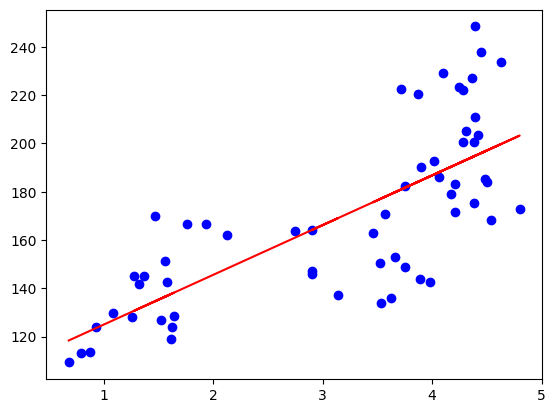

In [100]:
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, yP, color="red", label="Regression line")

In [91]:
# Now below we as well calculate the r^2
r**2

np.float64(0.5593054376986356)

# **bonus for you to try**

**See how much the minimum apple stock price would be if in a hypothetical situation interest rates were nearly 0**